# Sprint23 LSTM

## 【問題1】各種手法の実行
---
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

    SimpleRNN
    GRU
    LSTM
    ConvLSTM2D


## LSTM

In [ ]:
'''Trains an LSTM model on the IMDB sentiment classification task.

The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.

# Notes

- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.

- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 379s 479ms/step - loss: 0.4350 - accuracy: 0.7943 - val_loss: 0.3599 - val_accuracy: 0.8398
Epoch 2/15
782/782 [==============================] - 381s 487ms/step - loss: 0.2554 - accuracy: 0.8961 - val_loss: 0.3812 - val_accuracy: 0.8363
Epoch 3/15
782/782 [==============================] - 379s 485ms/step - loss: 0.1615 - accuracy: 0.9401 - val_loss: 0.5916 - val_accuracy: 0.8157
Epoch 4/15
782/782 [==============================] - 375s 479ms/step - loss: 0.1057 - accuracy: 0.9608 - val_loss: 0.6451 - val_accuracy: 0.8242
Epoch 5/15
782/782 [==============================] - 373s 478ms/step - loss: 0.0694 - accuracy: 0.9762 - val_loss: 0.6045 - val_accuracy: 0.8201
Epoch 6/15
782/782 [==================

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


## GRU

In [ ]:
from keras.layers import SimpleRNN, GRU

In [ ]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Build model...
Train...
Epoch 1/15
782/782 [==============================] - 231s 291ms/step - loss: 0.4416 - accuracy: 0.7837 - val_loss: 0.3760 - val_accuracy: 0.8355
Epoch 2/15
782/782 [==============================] - 226s 290ms/step - loss: 0.2418 - accuracy: 0.9044 - val_loss: 0.3903 - val_accuracy: 0.8380
Epoch 3/15
782/782 [==============================] - 226s 289ms/step - loss: 0.1391 - accuracy: 0.9493 - val_loss: 0.4230 - val_accuracy: 0.8330
Epoch 4/15
782/782 [==============================] - 227s 290ms/step - loss: 0.0761 - accuracy: 0.9728 - val_loss: 0.5380 - val_accuracy: 0.8295
Epoch 5/15
782/782 [==============================] - 228s 291ms/step - loss: 0.0414 - accuracy: 0.9862 - val_loss: 0.7479 - val_accuracy: 0.8234
Epoch 6/15
782/782 [==============================] - 226s 289ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.7807 - val_accuracy: 0.8122
Epoch 7/15
782/782 [==============================] - 226s 289ms/step - loss: 0.0205 - accuracy: 0.9

## SimpleRNN

In [ ]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/15
782/782 [==============================] - 88s 112ms/step - loss: 0.6857 - accuracy: 0.5434 - val_loss: 0.6414 - val_accuracy: 0.6218
Epoch 2/15
782/782 [==============================] - 88s 112ms/step - loss: 0.5314 - accuracy: 0.7376 - val_loss: 0.5926 - val_accuracy: 0.7373
Epoch 3/15
782/782 [==============================] - 88s 112ms/step - loss: 0.4520 - accuracy: 0.7918 - val_loss: 0.4660 - val_accuracy: 0.7969
Epoch 4/15
782/782 [==============================] - 87s 111ms/step - loss: 0.3772 - accuracy: 0.8392 - val_loss: 0.5765 - val_accuracy: 0.6976
Epoch 5/15
782/782 [==============================] - 86s 110ms/step - loss: 0.3484 - accuracy: 0.8595 - val_loss: 0.5967 - val_accuracy: 0.7785
Epoch 6/15
782/782 [==============================] - 86s 110ms/step - loss: 0.3128 - accuracy: 0.8764 - val_loss: 0.4808 - val_accuracy: 0.8053
Epoch 7/15
782/782 [==============================] - 87s 111ms/step - loss: 0.4435 - accuracy: 0.7834 - v

## ConvLSTM2D

Epoch 1/300
95/95 [==============================] - 64s 458ms/step - loss: 0.8098 - val_loss: 0.7021
Epoch 2/300
95/95 [==============================] - 43s 456ms/step - loss: 0.7446 - val_loss: 0.7359
Epoch 3/300
95/95 [==============================] - 43s 454ms/step - loss: 0.7045 - val_loss: 0.7502
Epoch 4/300
95/95 [==============================] - 44s 461ms/step - loss: 0.6735 - val_loss: 0.7047
Epoch 5/300
95/95 [==============================] - 43s 456ms/step - loss: 0.6498 - val_loss: 0.6665
Epoch 6/300
95/95 [==============================] - 43s 455ms/step - loss: 0.6300 - val_loss: 0.6556
Epoch 7/300
95/95 [==============================] - 44s 461ms/step - loss: 0.6124 - val_loss: 0.6235
Epoch 8/300
95/95 [==============================] - 43s 456ms/step - loss: 0.5965 - val_loss: 0.5949
Epoch 9/300
95/95 [==============================] - 44s 461ms/step - loss: 0.5818 - val_loss: 0.5765
Epoch 10/300
95/95 [==============================] - 44s 461ms/step - loss: 0.568

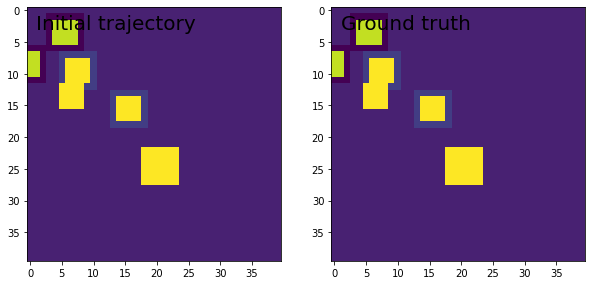

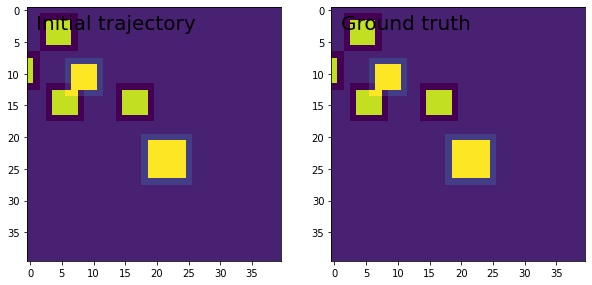

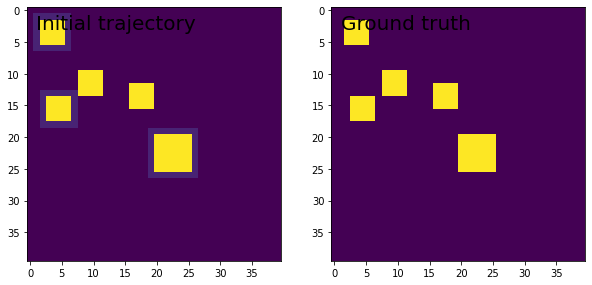

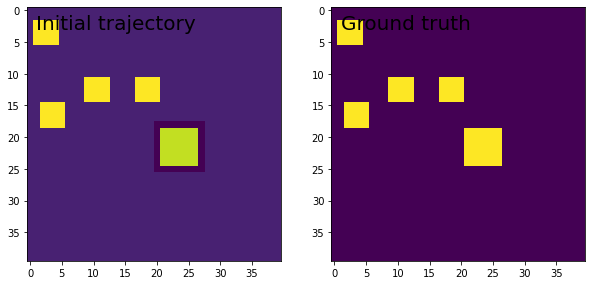

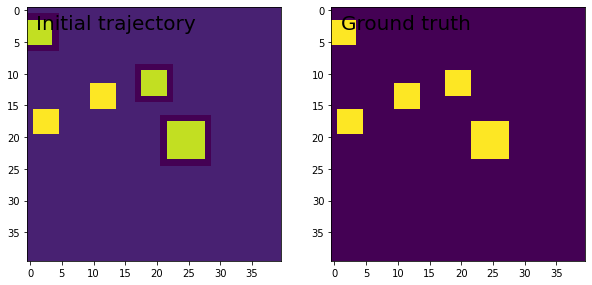

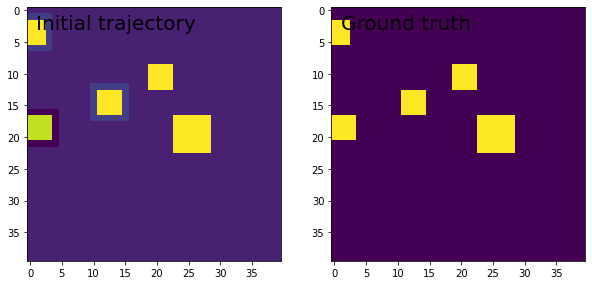

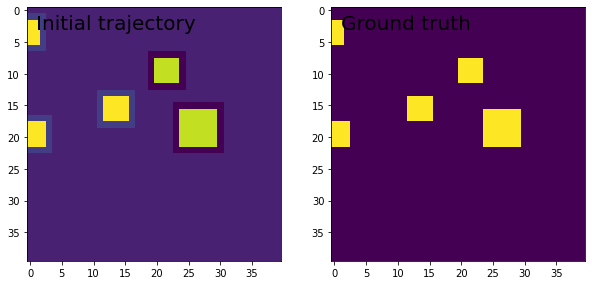

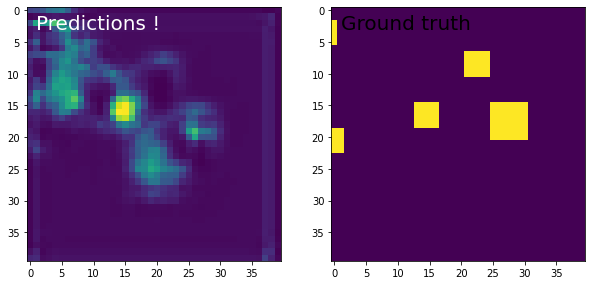

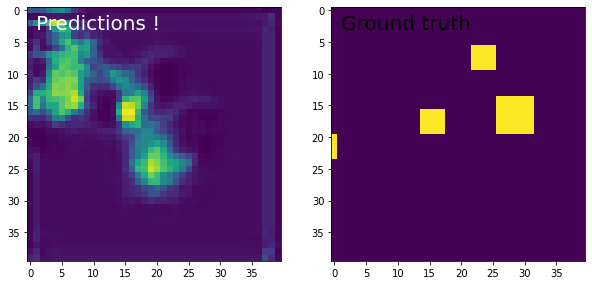

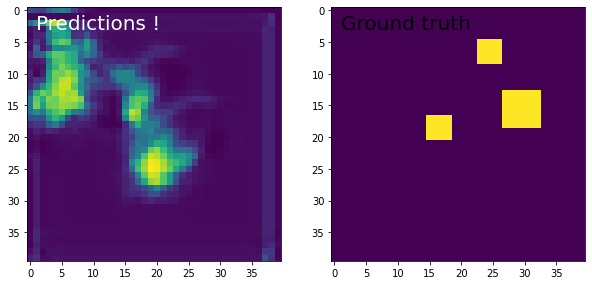

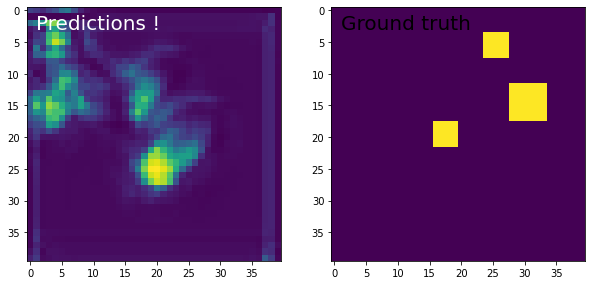

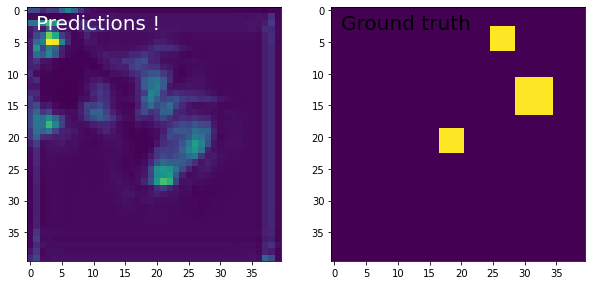

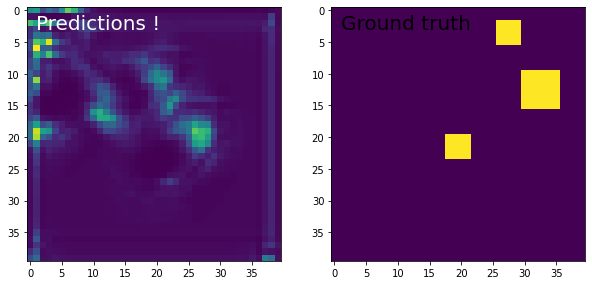

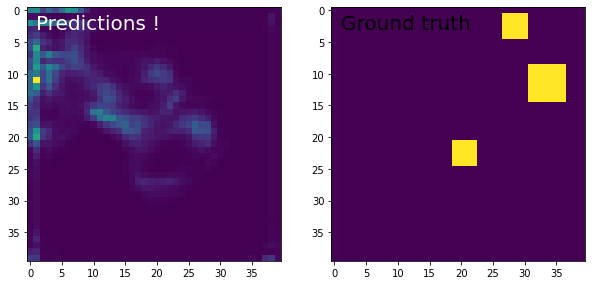

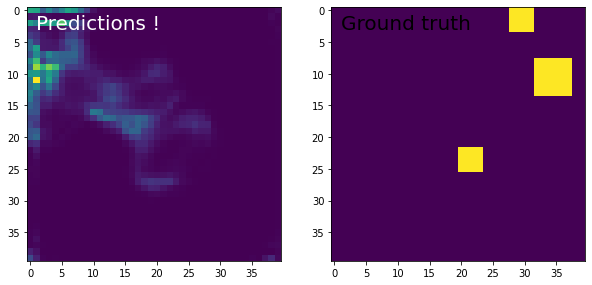

In [ ]:
""" This script demonstrates the use of a convolutional LSTM network.

This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
# from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=300, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))


## 【問題3】他のクラスの説明
---
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

-    RNN
-    SimpleRNNCell
-    GRUCell
-    LSTMCell
-    StackedRNNCells
-    CuDNNGRU
-    CuDNNLSTM


RNN（Recurrent Neural Network）:
 時系列データに対応したニューラルネットワーク。RNNの特徴は、ループする経路を持っており、
 このループする経路によって、データは絶えず循環することができる。そしてデータが循環することにより、
 過去の情報を記録しながら、最新のデータへと更新される。
 
 
 SimpleRNNCell：
 SimpleRNNのセルクラス。このクラスは時間シーケンス入力全体の1つのステップを処理している。
 SimpleRNNCell で単一のサンプルに対する操作（セル）を定義し、それを RNN() で囲むことによってバッチを処理するレイヤーを定義している。
 前の時間ステップの出力が次の時間ステップにフィードされる、完全に連結されたRNN。
 
 GRUCell：
 GRU レイヤーに対応。sequencesの戻り値のオプションはなく、1つのタイムスタンプのみを計算して返します。
 
 LSTMCell：
 LSTM 層のセルクラス。このクラスは時間シーケンス入力全体の1つのステップを処理している。
 入力データのバッチサイズ×入力した次元を引数として受け取る。
 
 StackedRNNCells：
 RNNセルのスタックを単一のセルとして振る舞うことを可能にするラッパー。
 効率的なスタック型RNNの実装に使用する。
 
 CuDNNGRU：
 CuDNNを利用した高速なGRU実装。TensorFlowバックエンドでGPU上でのみ動作する。
 
 CuDNNLSTM：
 CuDNNを利用した高速なLSTM実装。TensorFlowバックエンドでGPU上でのみ動作する。
 cuDNNLSTMは生成と生成の間でバファーのサイズが変更される可能性があり、そのため重みとバイアスを保存して使用する必要がある。
 